# Úkol č. 2 - Využití shlukování pro počítání objektů na obrázku
  * **Deadline je do 22. listopadu 23:59.** Pokud odevzdáte úkol do 29. listopadu 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte vhodným způsobem vybírat příznaky pro shlukovací algoritmy. Někdy je vhodné použít barevnou reprezentaci obrázku (RGB nebo spíše HSV), jindy je lepší použít souřadnice pixelů v obrázku.
  * Samozřejmě existují mnohem pokročilejší nástroje pro segmentaci objektů na obrázku, které jsou dostupné v různých knihovnách, ale tady nám jde o to vyzkoušet si na jednoduché úloze aplikaci základních shlukovacích metod.
  * Vaším cílem je využít algoritmus **KMeans a hierarchické aglomerativní shlukování** k tomu, abyste vytvořili jednoduchý kód, který, když na vstupu dostane obrázek z dané sady, dokáže vrátit **počet objektů**, které se na obrázku vyskytují.
  
  
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat
Budeme pracovat s obrázky, které jsou uložené v podadresáři `data` a originálně pocházejí z datasetu [CLEVR](https://cs.stanford.edu/people/jcjohns/clevr/). Na těchto obrázcích jsou různě rozmístěné barevné objekty na šedém pozadí.

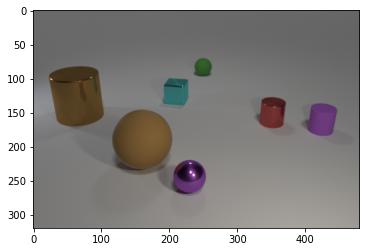

In [65]:
# Ukázka jednoho z obrázků
from PIL import Image
from matplotlib import pyplot as plt

with Image.open("data/CLEVR_test_001109.png").convert('RGB') as image:
    plt.imshow(image)

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
- Vezměte libovolný obrázek z datasetu (pro začátek doporučuji nějaký, kde jsou objekty spíše dál od sebe), načtěte ho a zobrazte.
- Převeďte ho do `numpy` array, která pak přeskupte (reshape) do pole bodů v prostoru RGB, tj. do tvaru `(počet bodů, 3)`.
- V tomto barevném příznakovém prostoru zkuste provést shlukování (vyberte vhodný algoritmus na základě velikosti a charakteru dat) a diskutujte výsledky (které asi nebudou nic moc).
- Zkuste příznaky obohatit o prostorové souřadnice (k tomu využijte numpy funkci `meshgrid` s parametrem `indexing='ij'` a také funkci `concatenate`, která umožní připojení k obrázkovým datům). Jako výstup tohoto kroku byste měli mít pole ve tvaru `(počet bodů, 5)`, kde první 3 příznaky odpovídají barvám a zbylé dva souřadnicím každého z pixelů.
- V tomto obohaceném příznakovém prostoru znovu zkuste shlukování a diskutujte výsledky (které asi opět nebudou nic moc).
- Nyní to celé zkusíme znovu, ale po načtení a zobrazení si obrázek převedeme do barevné reprezentace HSV. V první fázi si tedy obrázek načtěte do HSV reprezentace (balíček PIL na to má metodu `convert("HSV")`).
- Dále v tomto novém barevném prostoru proveďte shlukování pomocí KMeans a vhodným výběrem shluků (koukejte na saturation příznak) si odseparujte barevné objekty od pozadí (bez jejich odlišení - to provedeme později).
Dostanete něco takového: 

![title](./mask_of_objects.png)
- Když už máme objekty odseparované od pozadí (použijte logickou masku pro filtrování array, kterou si vytvoříte v předchozím kroku), budeme dále pracovat pouze s odpovídajícími pixely (pozadí už ne bereme). 
- Nyní si pro tyto pixely vytvoříme reprezentaci pomocí jejich souřadnic v původním obrázku (použijeme výše zmíněný `meshgrid` a také logickou masku).
- V tomto souřadnicovém prostoru proveďte vhodné shlukování, aby došlo ke správnému odseparování předmětů.
Finální výstup by měl vypadat nějak takto:

![title](./final_output.png)
- Diskutujte úskalí navrženého postupu a jeho univerzálnost pro počítání objektů na libovolném pozadí resp. částečně se překrývajících objektů. 

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
- (až +4 body) Polaďte algoritmus tak, aby pro téměř libovolný vstup z dané datové sady vypsal správný počet objektů a odseparoval je tak, jak je zobrazeno výše. K tomu je třeba správně zvolit shlukovací algoritmus v posledním kroku a také kritérium pro automatickou detekci správného počtu shluků. Diskutujte Váš postup.
- (až +4 body) Poslední shlukování pro odseparování předmětů jsme dělali pouze v souřadnicovém prostoru. Zkuste experimentovat s reprezentací v prostoru, kde jsou zkombinovány jak barevné tak i souřadnicové příznaky (s různými váhami mezi oběma skupinami). Cílem je opět automatická detekce počtu objektů pro libovolný vstup z dané datové sady. Diskutujte Váš postup a případné výhody tohoto přístupu, ve kterém se kombinují oba typy příznaků.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

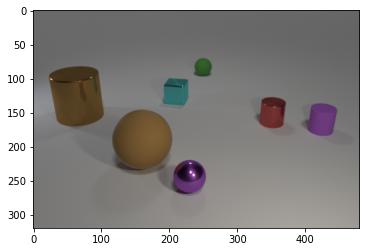

In [ ]:
# Ukázka jednoho z obrázků
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.image import imread

imagePath = "data/CLEVR_test_001109.png"
image =  Image.open(imagePath).convert(colors="RGB")
plt.imshow(image)
data = np.array(image)

# Vytvoření masky
Nejdříve se pokusíme vytvořit masku clusterováním na 2 clustery.

Začneme prostým kmeans s rgb pixelama obrázku.

In [ ]:
### odtud už je to Vaše
from sklearn.cluster import KMeans

data = np.array(image)
data = np.delete(data,axis=2,obj=3)

w,h,d = tuple(data.shape)
data = np.reshape(data, (w * h, 3))


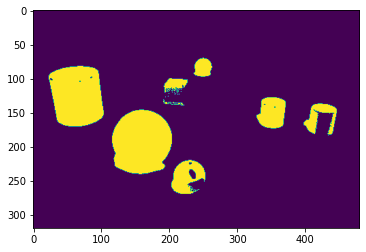

In [ ]:
km = KMeans(n_clusters=2, n_init=30, max_iter=300).fit(data)
result = km.labels_.reshape(w,h)
plt.imshow(result)

Jak vidíme, tato maska je vskutku špatná. Algoritmus vybírá i stíny objektů a u některých vynechá zastíněné, či nasvícené části objektů. Zkusíme tedy spolu s barvami přidat ke každému pixelu i jeho souřadnici.

In [ ]:
indexes = []
y = range(w)
x = range(h)
for i in y:
    for o in x:
        indexes.append([i,o])
data_indexed = np.concatenate((data,indexes),axis=1)

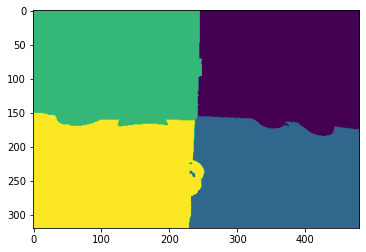

In [ ]:
km = KMeans(n_clusters=4, n_init=10, max_iter=300).fit(data_indexed)
result = km.labels_.reshape(w,h)
plt.imshow(result)

Při použití souřadnic bude kmeans preferovat samotné souřadnice. Díky tomu se nám při rozdělení clusterů na 4 (které jsem vybral jen abych toto ukázal) obrázek rozdělil na 4 přibližně stejně velké části.

Jako další pokus zkusíme obrázek nejdříve převést na HSV color space a ten poté clusterovat pouze s přiznakem saturation.

In [ ]:
from matplotlib.colors import rgb_to_hsv

image_hsv = imread(imagePath)
image_hsv = np.delete(image_hsv,axis=2,obj=3)
image_hsv = rgb_to_hsv(image_hsv)

In [ ]:
data_hsv = np.array(image_hsv)

data_hsv = np.delete(data_hsv,axis=2,obj=(0,2))
data_hsv = np.reshape(data_hsv, (w * h, 1))

(153600,)


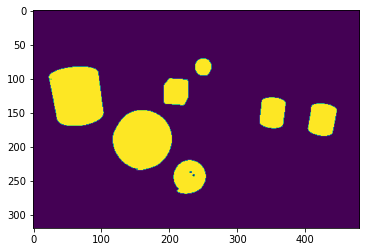

In [ ]:
km_hsv = KMeans(n_clusters=2, n_init=50, max_iter=300).fit(data_hsv)

result = km_hsv.labels_.reshape(w,h)
plt.imshow(result)
print(km_hsv.labels_.shape)

Jak můžeme vidět, nyní se nám vytvořila maska jako v ukázce. Tuto masku si tedy uložíme a díky ní odstraníme pozadí na originálním obrázku a ten poté bez pozadí opět vyclusterujeme.

In [ ]:
result.reshape(320*480)
idx = (result == 1)
ixy = (result == 0)

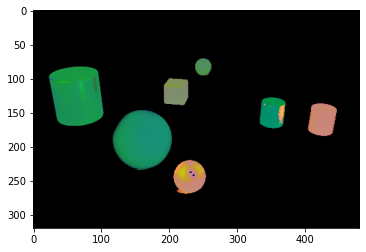

In [ ]:
masked_image = np.zeros_like(image_hsv)
masked_image[idx] = np.array(image_hsv)[idx]
plt.imshow(masked_image)

Obrázek ve formátu HSV poté co jsme na něj aplikovali masku.
# Clusterování s maskou
Nejdříve vyzkoušíme clusterování s KMeans

In [ ]:
data_hsv = data_hsv * 255
masked_image_indexed = np.concatenate((data_hsv,np.array(indexes)),axis=1)

In [ ]:
mmm = np.array(masked_image_indexed)[idx.reshape(w*h)]

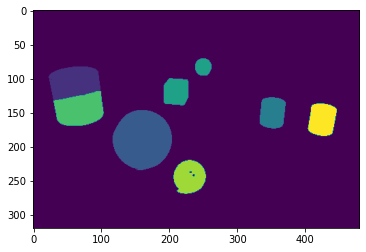

In [ ]:
km_masked_indexed = KMeans(n_clusters=7, n_init=10, max_iter=300).fit(mmm)
mm_image = np.zeros_like(result)
mm_image[idx] = km_masked_indexed.labels_+1
pp = np.reshape(mm_image,(w,h))
plt.imshow(pp)

Jak můžeme vidět, clusterování objektů se s KMeans moc nepovedlo. Tak vyzkoušíme hierarchické clusterování

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(mmm, method="single", metric="euclidean")

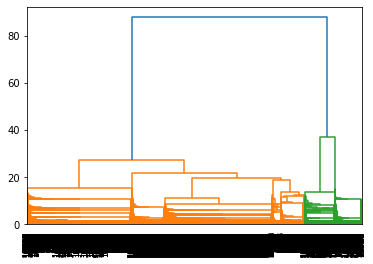

In [ ]:
dendrogram(
    Z,
    leaf_rotation=90.,  # otočení popisů x-ové osy
    leaf_font_size=8.,  # velikost fontu popisů x-ové osy
)

plt.show()

S pomocí obrázku nyní určíme odpovídající vzdálenost na odříznutí clusterů.

In [ ]:
from scipy.cluster.hierarchy import fcluster

max_d = 16
clusters = fcluster(Z, max_d, criterion="distance")

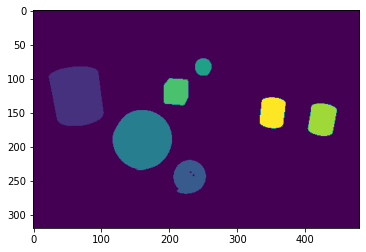

In [ ]:
mm_image = np.zeros_like(result)
mm_image[idx]  = clusters
pp = np.reshape(mm_image,(w,h))
plt.imshow(pp)

A vyšel nám zadaný obrázek s počtem clusterů = 7

Tento postup rozhodně není univerzální. Silně souvisí na pozadí, které je z jiné barvy než samotné objekty. V případě, že by byly podobné barvy, by mohly pro algorimu připadat jako součást pozadí a maska by ho odebrala pryč.

# Bonus
Nyní vytvoříme funkci pro jednoduché měnení obrázků.

In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.image import imread
from matplotlib.colors import rgb_to_hsv
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [66]:
def analyzePicture(imagePath):
    image_hsv = imread(imagePath)
    image_hsv = np.delete(image_hsv,axis=2,obj=3)
    image_hsv = rgb_to_hsv(image_hsv)
    data_hsv = np.array(image_hsv)

    w,h,d = tuple(data_hsv.shape)
    indexes = []
    y = range(w)
    x = range(h)
    for i in y:
        for o in x:
            indexes.append([i,o])
            

    data_hsv = np.delete(data_hsv,axis=2,obj=(0,2))
    data_hsv = np.reshape(data_hsv, (w * h, 1))
    km_hsv = KMeans(n_clusters=2, n_init=50, max_iter=300).fit(data_hsv)

    result = km_hsv.labels_.reshape(w,h)
    result.reshape(320*480)
    idx = (result == 1)

    indexes = np.array(indexes) * 1.5
    data_hsv = data_hsv /10# 255
    masked_image_indexed = np.concatenate((data_hsv,np.array(indexes)),axis=1)
    mmm = np.array(masked_image_indexed)[idx.reshape(w*h)]
    Z = linkage(mmm, method="single", metric="euclidean")


    max_d = 5
    clusters = fcluster(Z, max_d, criterion="distance")
    count = np.unique(clusters).shape[0]
    print(count)
    mm_image = np.zeros_like(result)
    mm_image[idx]  = clusters+1
    pp = np.reshape(mm_image,(w,h))
    
    plt.figure(figsize=(200,300),)
    
    f, axarr = plt.subplots(2,1)
    axarr[0].imshow( Image.open(imagePath))
    axarr[1].imshow(pp)

    return count

5


<Figure size 14400x21600 with 0 Axes>

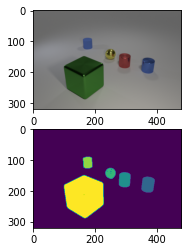

In [68]:
assert(analyzePicture("data/CLEVR_test_000014.png") == 5)

3


<Figure size 14400x21600 with 0 Axes>

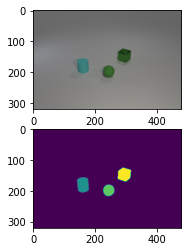

In [99]:
assert(analyzePicture("data/CLEVR_test_000214.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

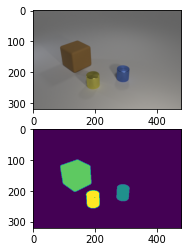

In [70]:
assert(analyzePicture("data/CLEVR_test_000377.png") == 3)

4


<Figure size 14400x21600 with 0 Axes>

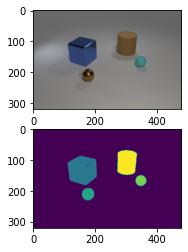

In [71]:
assert(analyzePicture("data/CLEVR_test_000388.png") == 4)

3


<Figure size 14400x21600 with 0 Axes>

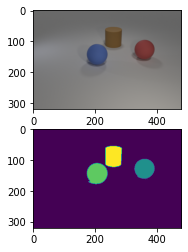

In [72]:
assert(analyzePicture("data/CLEVR_test_000389.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

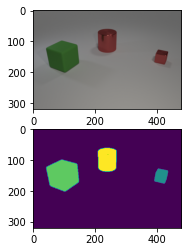

In [73]:
assert(analyzePicture("data/CLEVR_test_000411.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

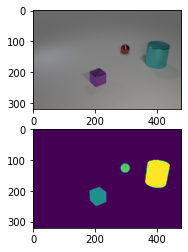

In [74]:
assert(analyzePicture("data/CLEVR_test_000439.png") == 3)

5


<Figure size 14400x21600 with 0 Axes>

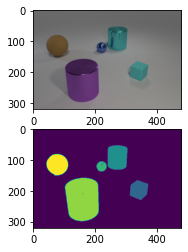

In [101]:
assert(analyzePicture("data/CLEVR_test_000558.png") == 5)

3


<Figure size 14400x21600 with 0 Axes>

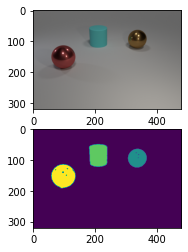

In [76]:
assert(analyzePicture("data/CLEVR_test_000559.png") == 3)

4


<Figure size 14400x21600 with 0 Axes>

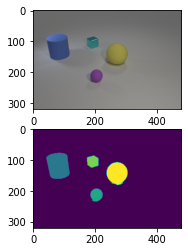

In [77]:
assert(analyzePicture("data/CLEVR_test_000565.png") == 4)

6


<Figure size 14400x21600 with 0 Axes>

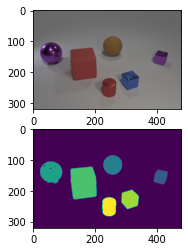

In [78]:
assert(analyzePicture("data/CLEVR_test_000606.png") == 6)

4


<Figure size 14400x21600 with 0 Axes>

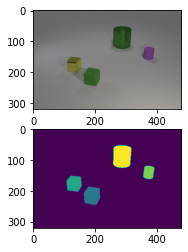

In [79]:
assert(analyzePicture("data/CLEVR_test_000758.png") == 4)

5


<Figure size 14400x21600 with 0 Axes>

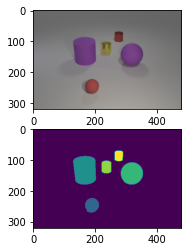

In [80]:
assert(analyzePicture("data/CLEVR_test_000766.png") == 5)

3


<Figure size 14400x21600 with 0 Axes>

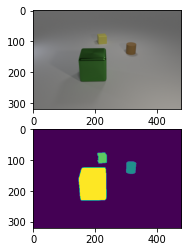

In [81]:
assert(analyzePicture("data/CLEVR_test_000770.png") == 3)

4


<Figure size 14400x21600 with 0 Axes>

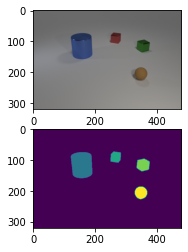

In [82]:
assert(analyzePicture("data/CLEVR_test_000821.png") == 4)

5


<Figure size 14400x21600 with 0 Axes>

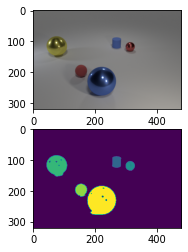

In [83]:
assert(analyzePicture("data/CLEVR_test_000835.png") == 5)

4


<Figure size 14400x21600 with 0 Axes>

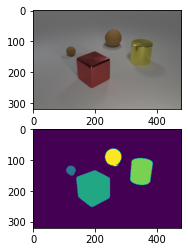

In [84]:
assert(analyzePicture("data/CLEVR_test_000837.png") == 4)

3


<Figure size 14400x21600 with 0 Axes>

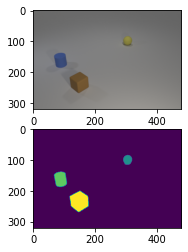

In [85]:
assert(analyzePicture("data/CLEVR_test_000941.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

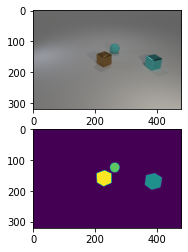

In [86]:
assert(analyzePicture("data/CLEVR_test_000955.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

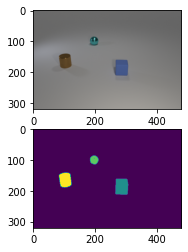

In [87]:
assert(analyzePicture("data/CLEVR_test_000994.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

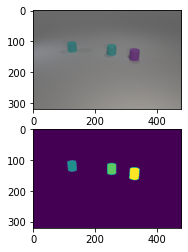

In [88]:
assert(analyzePicture("data/CLEVR_test_000997.png") == 3)

7


<Figure size 14400x21600 with 0 Axes>

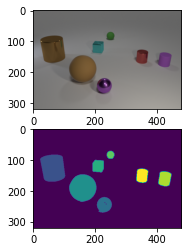

In [89]:
assert(analyzePicture("data/CLEVR_test_001109.png") == 7)

6


<Figure size 14400x21600 with 0 Axes>

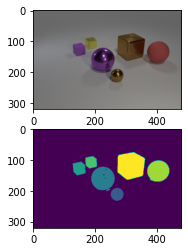

In [90]:
assert(analyzePicture("data/CLEVR_test_001256.png") == 6)

3


<Figure size 14400x21600 with 0 Axes>

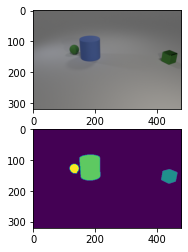

In [91]:
assert(analyzePicture("data/CLEVR_test_001294.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

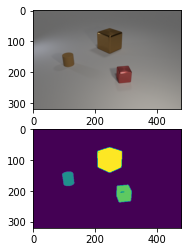

In [92]:
assert(analyzePicture("data/CLEVR_test_001525.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

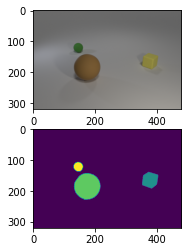

In [93]:
assert(analyzePicture("data/CLEVR_test_001530.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

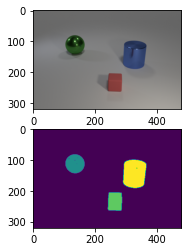

In [94]:
assert(analyzePicture("data/CLEVR_test_001652.png") == 3)

3


<Figure size 14400x21600 with 0 Axes>

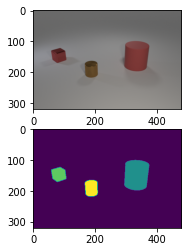

In [96]:
assert(analyzePicture("data/CLEVR_test_001685.png") == 3)

4


<Figure size 14400x21600 with 0 Axes>

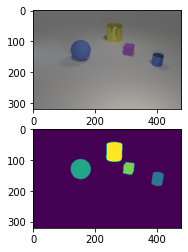

In [97]:
assert(analyzePicture("data/CLEVR_test_001687.png") == 4)

5


<Figure size 14400x21600 with 0 Axes>

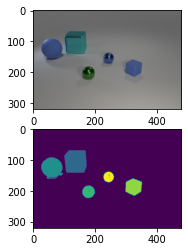

In [98]:
assert(analyzePicture("data/CLEVR_test_001690.png") == 5)